# Loan 데이터 분류모형 예측성능 비교

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Desktop\data\loan.csv')
df

,y,loan,mortgage,job,workyear,delinquency,period,inquire,transact,DTI
0,1,1300,70053,Other,7,2,121.83,0,14,48.20
1,1,1500,13500,Other,4,0,149.47,1,10,40.86
2,1,1500,78553,Other,10,1,107.81,2,25,39.60
3,0,1700,97800,Office,3,0,93.33,0,14,48.65
4,1,1700,30548,Other,9,0,101.47,1,8,37.11
...,...,...,...,...,...,...,...,...,...,...
6986,1,1800,48649,Other,5,2,77.10,1,17,36.44
6987,1,1800,28502,Other,11,0,88.77,0,8,36.88
6988,1,2000,32700,Other,3,2,216.93,1,12,36.83
6989,1,2000,82919,Sales,16,0,115.80,0,13,29.26


In [5]:
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})

In [6]:
X = df.drop(['y'], axis=1)
y = df['y']
xname = X.columns
yname = ['Normal','Bad']

## Train/Test 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

## AdaBoost 방법

In [8]:
from sklearn.ensemble import AdaBoostClassifier

#### Classifier 가 의사결정나무인 경우

In [9]:
ada_tree = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_tree.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

#### Classifier 가 로지스틱 회귀분석인 경우

In [10]:
from sklearn.linear_model import LogisticRegression
ada_logit = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000),n_estimators=100,random_state=0)
ada_logit.fit(X_train, y_train)

C:\Users\hopio\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000),
                   n_estimators=100, random_state=0)

## Gradient Boosting 방법

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

#### Default 옵션: max_depth=3

In [12]:
gb_tree = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_tree.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

#### 트리의 크기를 크게, max_depth=7

In [13]:
gb_depth = GradientBoostingClassifier(n_estimators=100,max_depth=7, random_state=0)
gb_depth.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, random_state=0)

## Random Forest 방법

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_sqrt = RandomForestClassifier(n_estimators=100,max_features="sqrt",random_state=0)
rf_sqrt.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

## 다른 분류방법과의 비교

### 로지스틱 회귀분석

In [15]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0, max_iter = 1000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### 신경망분석

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
c_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0, max_iter = 1000)
c_nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=0)

### SVM

In [17]:
from sklearn import svm
c_svm = svm.SVC(kernel='rbf', random_state=0)
c_svm.fit(X_train_scaled,y_train)

SVC(random_state=0)

### ROC 곡선 및 AUC

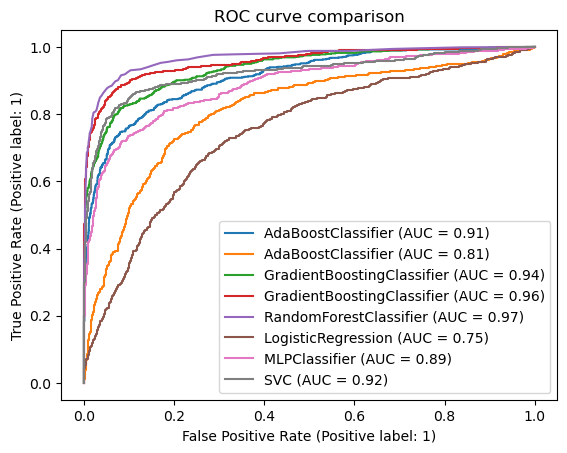

In [20]:
from sklearn.metrics import RocCurveDisplay
m1_roc=RocCurveDisplay.from_estimator(ada_tree, X_test, y_test)
RocCurveDisplay.from_estimator(ada_logit, X_test, y_test, ax = m1_roc.ax_)
RocCurveDisplay.from_estimator(gb_tree, X_test, y_test, ax = m1_roc.ax_)
RocCurveDisplay.from_estimator(gb_depth, X_test, y_test, ax = m1_roc.ax_)
RocCurveDisplay.from_estimator(rf_sqrt, X_test, y_test, ax = m1_roc.ax_)
RocCurveDisplay.from_estimator(logit, X_test, y_test, ax = m1_roc.ax_)
RocCurveDisplay.from_estimator(c_nn, X_test_scaled, y_test, ax = m1_roc.ax_)
RocCurveDisplay.from_estimator(c_svm, X_test_scaled, y_test, ax = m1_roc.ax_)
plt.title("ROC curve comparison")
plt.show()

## 변수중요도 (Gradient Boosting)

In [21]:
gb_tree.feature_importances_

array([0.0572414 , 0.04265085, 0.01983465, 0.01503077, 0.4350698 ,
       0.06200516, 0.13534894, 0.05202768, 0.18079076])

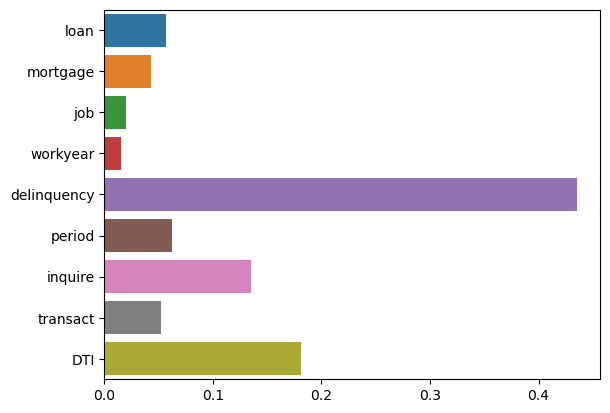

In [22]:
sns.barplot(x=gb_tree.feature_importances_, y=xname)
plt.show()